# Determination of a profitable plan for a telecom company

## Project Description

We have conducted a marketing research project to determine a good plan for a telecom company. Through preliminary analysis of a sample of customers, we discovered that many of them were using archived rates. By analyzing customers' behavior when using our operator's services, we recommended optimal sets of benefits for users. We also tested hypotheses about the differences in revenue among subscribers on different tariffs and among subscribers from Moscow and other regions.
Based on our research, we identified an excellent tariff plan that will allow us to adjust our advertising budget. Additionally, we developed a system that can analyze customer behavior and recommend new tariffs better suited to their needs. To achieve this, we built a classification model with the highest possible accuracy, gaining a share of correct answers of 0.75. We have also verified the accuracy of our model on a test sample.
Overall, our research has allowed us to make data-driven decisions to help our telecom company achieve greater profitability and better serve our customers.

## Columns description

#### users — an information about users: 

user_id — user-id

first_name — the first name of a user

last_name — a surname of the user

age — user's age

reg_date — tariff activation date (day, month, year)

churn_date — date of termination of using the tariff (if the value is omitted, it means that the tariff was still valid at the time of uploading the data)

city — the name of the user's settlement

tarif — the name of the tariff

#### calls — an information about users' calls:

id — call's id

call_date — call date

duration — calls duration per minutes

user_id — user id 

#### messages — an information about users' messages:

id — message's id 

message_date — message date 

user_id — user id 

#### internet — an information about the Internet sessions :

id — session's id

mb_used — the amount of Internet traffic spent per session in megabytes

session_date — session date

user_id — user id

#### tariffs — информация о тарифах:

tariff_name — name of the tariff

rub_monthly_fee — the subscription fee 

minutes_included — the number of minutes per month included in the subscription fee

messages_included — the number of messages per month included in the subscription fee

mb_per_month_included — the amount of Internet traffic per month included in the subscription fee

rub_per_minute — the cost of extra-minutes out of the subscription fee

rub_per_message — the cost of extra-messages out of the subscription fee

rub_per_gb — the cost of extra-megabytes out of the subscription fee

## Import libraries and read CSV files

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st

### Calls

In [8]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
except: 
    calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')

In [13]:
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [14]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### Messages

In [9]:
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')

In [15]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Tariffs

In [10]:
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')

In [17]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [18]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Users

In [11]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

In [19]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Sessions

In [21]:
try:
    sessions = pd.read_csv('/datasets/internet.csv')
except:
    sessions = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')

In [23]:
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [22]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


## Data pre-processing

### Convert arguments to datetime

In [24]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') # ['reg_date']
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')# ['churn_date']
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')# ['call_date']
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')# ['message_date']
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')# ['session_date']

### Round the values of the duration column up  and cast the column to an integer value

In [26]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')

### ['Unnamed: 0'] drop

In [27]:
sessions.pop('Unnamed: 0')
print(sessions)

              id  mb_used session_date  user_id
0         1000_0   112.95   2018-11-25     1000
1         1000_1  1052.81   2018-09-07     1000
2         1000_2  1197.26   2018-06-25     1000
3         1000_3   550.27   2018-08-22     1000
4         1000_4   302.56   2018-09-24     1000
...          ...      ...          ...      ...
149391  1499_152   318.90   2018-10-03     1499
149392  1499_153   490.13   2018-12-14     1499
149393  1499_154     0.00   2018-10-27     1499
149394  1499_155  1246.32   2018-11-26     1499
149395  1499_156   544.37   2018-10-26     1499

[149396 rows x 4 columns]


### Month column in Data Frame

In [28]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
print(calls['month'])

0          7
1          8
2          6
3          9
4         12
          ..
202602    12
202603    10
202604    11
202605    10
202606    12
Name: month, Length: 202607, dtype: int64


In [29]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [30]:
sessions['month'] = pd.DatetimeIndex(sessions['session_date']).month

### Number of calls made for each user by month

In [31]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

In [32]:
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

### The number of spent minutes of conversation for each user by month

In [33]:
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))

In [34]:
minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

### The number of messages spent per month by users

In [35]:
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))

In [36]:
messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

### The number of sessions spent per month by users

In [38]:
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [39]:
sessions_per_month.head(30)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

## The analysis of the Data and cashing up

We combine all the values ​​calculated above into one user_behavior dataframe. For each "user - month" pair, information about the tariff, the number of calls, messages and spent megabytes will be available.

In [40]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

7.6% of clients from the dataset terminated the contract

In [41]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [42]:
user_behavior.isna().sum() #missing values check

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

### Removal the missing values

In [43]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

### Reshape the Data

In [44]:
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [45]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

We count the number of minutes of conversation, messages and megabytes exceeding those included in the tariff

In [46]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

In [47]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

We consider income for minutes of conversation, messages and the Internet

In [48]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Cash-up income per month. The data is stored in column called `total_cost`

In [49]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

Data Frame `stats_df` stores main items 

In [51]:
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


### Distribution of the average number of calls by types of tariffs and months

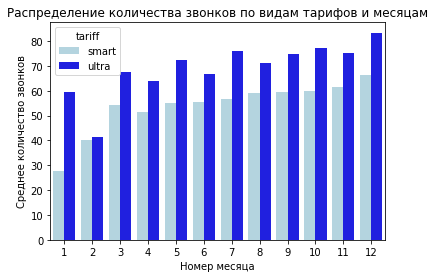

In [53]:

ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

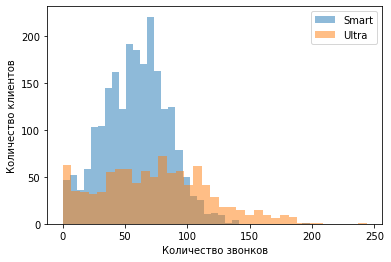

In [54]:
import matplotlib.pyplot as plt

user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

### Distribution of average duration of calls by types of tariffs and months

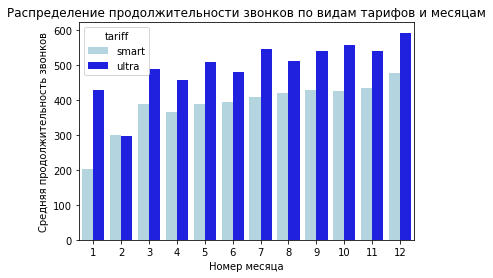

In [55]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

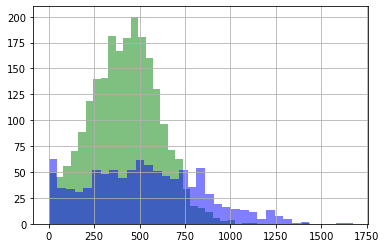

In [56]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue');

The average duration of calls for Ultra tariff subscribers is longer than for Smart tariff subscribers. During the year, users of both tariffs increase the average duration of their calls. The growth of the average duration of calls for subscribers of the Smart tariff is uniform throughout the year. Users of the Ultra tariff do not show such linear stability. It should be noted that in February subscribers of both tariff plans had the lowest rates.

### Distribution of the average number of messages by types of tariffs and months

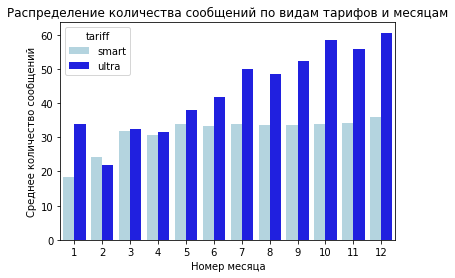

In [58]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

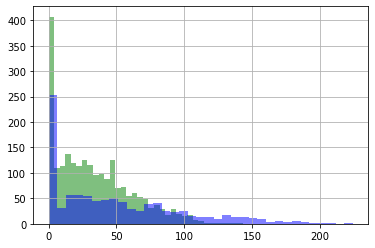

In [59]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');

On average, Ultra tariff users send more messages - almost 20 more messages than Smart tariff users. The number of messages during the year on both tariffs is growing. The dynamics of sending messages are similar to the trends in the duration of calls: in February, noted the smallest number of messages per year, and users of the Ultra tariff also show non-linear positive dynamics.

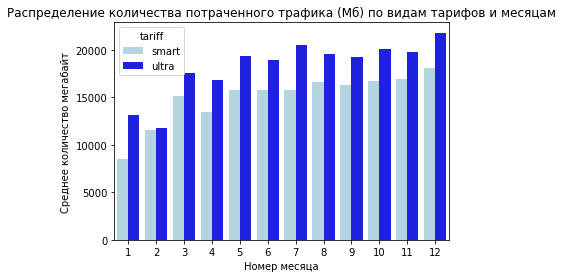

In [60]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

### Comparison of megabytes spent among users of Smart and Ultra tariffs

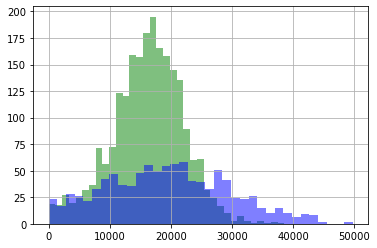

In [61]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');

## Statistical hypothesis testing

```
H_0: Revenue (total_cost) of "Ultra" users = revenue (total_cost) of "Smart" users`
H_a: Revenue (total_cost) of "Ultra" users ≠ revenue (total_cost) of "Smart" users`
alpha = 0.05
```

In [66]:
x = user_behavior.loc[user_behavior['tariff'] == 'ultra', 'total_cost']
y = user_behavior.loc[user_behavior['tariff'] == 'smart', 'total_cost']
results = st.ttest_ind(x,y, equal_var=False)

alpha = .05

print(results.pvalue) #P-value outputting
if results.pvalue < alpha:
    print("H_0 is rejected")
else:
    print("H_0 could not be rejected")

4.2606313931076085e-250
H_0 is rejected


```
H_0: Revenue (total_cost) of users from Moscow = revenue (total_cost) of users not from Moscow`
H_1: Revenue (total_cost) of users from Moscow ≠ revenue (total_cost) of users not from Moscow`
alpha = 0.05
```

In [68]:
x = user_behavior.loc[user_behavior['city'] == 'Москва', 'total_cost']
y = user_behavior.loc[user_behavior['tariff'] != 'Москва', 'total_cost']
results = st.ttest_ind(x,y, equal_var=False)

alpha = .05

print(results.pvalue)
if results.pvalue < alpha:
    print("H_0 is rejected")
else:
    print("H_0 could not be rejected")

0.5989670526299276
H_0 could not be rejected
